# **`IMPLEMENTATION OF ANN IN KERAS`**

In [27]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [28]:
#checking version of tensorflow and keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


Q2. Load the Wine Quality dataset and explore its dimensions.

In [29]:
# reading the dataset
df = pd.read_csv('wine.csv')

In [30]:
df.shape

(1599, 12)

#### Insight: total 1599 observations with 12 features

In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Q3. Check for null values, identify categorical variables, and encode them.

In [32]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Insight: no null values

In [33]:
#checking for categorical variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [34]:
# target variable is categorical
df.quality.unique()

array(['bad', 'good'], dtype=object)

In [35]:
#encoding target variable
df['quality'] = df.quality.map({'bad':0,'good':1})

Q4. Separate the features and target variables from the dataframe.

In [36]:
X = df.drop('quality',axis=1)
y = df['quality']

In [37]:
X.shape , y.shape

((1599, 11), (1599,))

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [38]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
X_train_full.shape,X_test.shape,y_train_full.shape,y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [40]:
X_train , X_val , y_train , y_val = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [41]:
X_train.shape , X_val.shape , y_train.shape , y_val.shape 

((895, 11), (224, 11), (895,), (224,))

Q6. Perform scaling on the dataset.

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [43]:
X_train[0] , X_val[0] ,X_test[0]

(array([ 0.59068961,  0.41222487, -0.04196674,  0.63215602,  0.04790641,
         0.87228742,  1.18501003,  1.60897428, -0.47978   , -0.21383167,
        -0.66892463]),
 array([-0.52427063,  1.36450688, -0.40114931,  1.93113988,  0.12911142,
         0.28167042,  1.51619319,  0.2036935 , -1.00320295, -0.81660127,
        -0.79576185]),
 array([-0.34822428,  0.1401443 , -0.96557905, -0.01733591,  0.53513642,
        -0.21051042, -0.04939995,  0.1876025 , -0.47978   ,  0.02727617,
        -0.76405254]))

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [53]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[11,], name = 'inputLayer'),
          tf.keras.layers.Dense(300 , activation = "elu" , name = 'hiddenLayer1'),
          tf.keras.layers.Dense(100 , activation = "elu" , name = 'hiddenLayer2'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation = "elu" , name = "hiddenLayer3"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(1, activation = "sigmoid" , name = "outputLayer"),]
model_clf = tf.keras.models.Sequential(LAYERS)

Q8. Create a Sequential model and add all the layers to it.

In [54]:
model_clf.layers

Q9. Print the summary of the model architecture.

In [55]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               3600      
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 hiddenLayer3 (Dense)        (None, 10)                1010      
                                                                 
 batch_normalization_5 (Batc  (None, 10)               40        
 hNormalization)                                      

Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.<br>
Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [56]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [57]:
# training

EPOCHS = 30
VALIDATION_SET = (X_val, y_val)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
28/28 [==============================] - 3s 24ms/step - loss: 0.5972 - accuracy: 0.7028 - val_loss: 0.6072 - val_accuracy: 0.7232
Epoch 2/30
28/28 [==============================] - 0s 10ms/step - loss: 0.5022 - accuracy: 0.7520 - val_loss: 0.5941 - val_accuracy: 0.7143
Epoch 3/30
28/28 [==============================] - 0s 10ms/step - loss: 0.5096 - accuracy: 0.7587 - val_loss: 0.5846 - val_accuracy: 0.7321
Epoch 4/30
28/28 [==============================] - 0s 9ms/step - loss: 0.5024 - accuracy: 0.7520 - val_loss: 0.5776 - val_accuracy: 0.7143
Epoch 5/30
28/28 [==============================] - 0s 9ms/step - loss: 0.4915 - accuracy: 0.7575 - val_loss: 0.5666 - val_accuracy: 0.7500
Epoch 6/30
28/28 [==============================] - 0s 9ms/step - loss: 0.4871 - accuracy: 0.7721 - val_loss: 0.5693 - val_accuracy: 0.7232
Epoch 7/30
28/28 [==============================] - 0s 10ms/step - loss: 0.4871 - accuracy: 0.7587 - val_loss: 0.5519 - val_accuracy: 0.7321
Epoch 8/30
28/28

Q13. Obtain the model's parameters (weights and biases).

In [58]:
model_clf.get_weights()

[array([[ 0.0609379 , -0.14149362, -0.06681447, ..., -0.08981571,
         -0.0642115 , -0.0124597 ],
        [ 0.11113413,  0.09851322, -0.12118078, ...,  0.0778859 ,
         -0.0665124 ,  0.04303778],
        [ 0.10674275, -0.03127024, -0.11428955, ..., -0.00168019,
         -0.14067589, -0.04082591],
        ...,
        [ 0.10052976, -0.06877737,  0.08016924, ...,  0.0616992 ,
          0.12417473, -0.02176883],
        [-0.11479966, -0.05786633,  0.12033996, ...,  0.03284412,
          0.09389953, -0.02974939],
        [-0.06661106,  0.05471587, -0.05550906, ..., -0.02799177,
          0.13964984, -0.05962362]], dtype=float32),
 array([-1.4474958e-03, -3.5106868e-03, -3.1485404e-03,  1.9888647e-04,
        -7.1119261e-04, -1.3235814e-03, -3.0290084e-03,  3.1131278e-03,
        -1.4536221e-03, -1.5583590e-03, -9.1223128e-04, -2.6655088e-03,
         1.2111817e-03, -7.0581579e-04, -4.6071988e-03, -1.3470661e-04,
        -1.5768900e-03, -1.6751703e-03,  2.4740112e-03, -1.0424394e-03

Q14. Store the model's training history as a Pandas DataFrame.

In [59]:
training_history = pd.DataFrame(history.history)
training_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.597180,0.702793,0.607153,0.723214
1,0.502229,0.751955,0.594077,0.714286
2,0.509613,0.758659,0.584639,0.732143
3,0.502393,0.751955,0.577579,0.714286
4,0.491453,0.757542,0.566627,0.750000


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: title={'center': 'Model Training History'}>

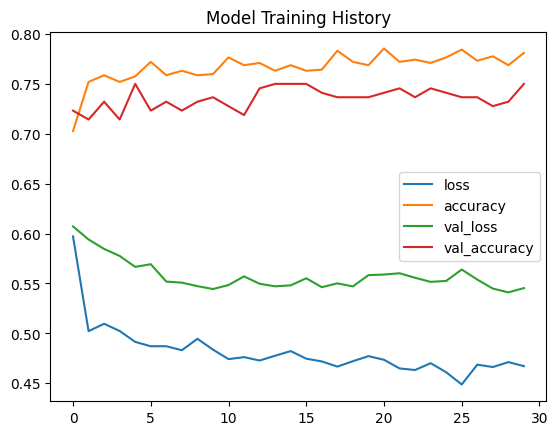

In [78]:
training_history.plot(title="Model Training History")

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [63]:
prediction = model_clf.evaluate(X_test,y_test)
prediction

15/15 [==============================] - 0s 5ms/step - loss: 0.5268 - accuracy: 0.7292


[0.5267515778541565, 0.7291666865348816]

In [76]:
print("Loss of prediction is {}".format(prediction[0]))
print("-"*40)
print("Accuracy of prediction is {}".format(prediction[1]))

Loss of prediction is 0.5267515778541565
----------------------------------------
Accuracy of prediction is 0.7291666865348816
